In [ ]:
!pip3 install -U pip
!pip3 install opencv-python

In [1]:
import sys
sys.path.append('/home/mhasan3/Desktop/WorkFolder')

In [2]:
# import the necessary keras packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from loader_util.preprocessing import ImageToArrayPreprocessor, \
    AspectAwarePreprocessor
from loader_util.datasets import SimpleDatasetLoader
from loader_util.nn.conv import FCHeadNet, MinVGGNet
##
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
data_dir = r'/home/mhasan3/Desktop/WorkFolder/keras_dir/biblio2/chap2_data_augmentation/flowers17/images/'

# grab the list of images

image_paths = list(paths.list_images(data_dir))
class_names = [pt.split(os.path.sep)[-2] for pt in image_paths]
unique_class_names = np.unique(class_names)
total_classes = len(unique_class_names)
print(f'[INFO] loading {len(image_paths)} images.....')

[INFO] loading 1360 images.....


In [4]:
# initialise the preprocessors
aap = AspectAwarePreprocessor(width=64, height=64)
iap = ImageToArrayPreprocessor()

# load the dataset from disk and then scale raw pixels to [0-1]
sdl = SimpleDatasetLoader(preprocessors=[aap, iap])
data, labels = sdl.load(image_paths,
                        verbose=500)  # type: np.ndarray, np.ndarray
data = data.astype('float') / 255.0

[INFO] processed 500/1360
[INFO] processed 1000/1360


In [5]:
# partition data into train and test splits
trainx, testx, trainy, testy = train_test_split(data,
                                                labels,
                                                test_size=0.25,
                                                random_state=42)
# convert labels to nos
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)

In [6]:
# create image generator
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode='nearest')

In [7]:
# init the optimizer and model
print(f'[INFO] compiling model.....')
opt = SGD(lr=0.05)
model = MinVGGNet.build(width=64,
                        height=64,
                        depth=3,
                        classes=total_classes)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] compiling model.....
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
print(f'[INFO] training network.....')


H = model.fit_generator(aug.flow(trainx, trainy, batch_size=32),
                        validation_data=(testx, testy),
                        epochs=100,
                        verbose=1,
                        )

[INFO] training network.....
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
32/32 [==============================] - 3s 99ms/step - loss: 3.2726 - acc: 0.2147 - val_loss: 3.3282 - val_acc: 0.1118
Epoch 2/100
32/32 [==============================] - 1s 25ms/step - loss: 2.3715 - acc: 0.3725 - val_loss: 2.9338 - val_acc: 0.2206
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 2.0179 - acc: 0.4098 - val_loss: 2.7551 - val_acc: 0.1765
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 1.8279 - acc: 0.4588 - val_loss: 2.8553 - val_acc: 0.1706
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 1.6645 - acc: 0.5010 - val_loss: 2.3451 - val_acc: 0.2735
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 1.7273 - acc: 0.4647 - val_loss: 1.8653 - val_acc: 0.3824
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 1.5163 - acc: 0.5216 - val_loss: 1.6463 - val_acc: 0.4382

Epoch 37/100
32/32 [==============================] - 1s 28ms/step - loss: 0.7495 - acc: 0.7500 - val_loss: 1.7110 - val_acc: 0.5647
Epoch 38/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6744 - acc: 0.7706 - val_loss: 1.0239 - val_acc: 0.6824
Epoch 39/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6759 - acc: 0.7725 - val_loss: 1.1128 - val_acc: 0.6824
Epoch 40/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6628 - acc: 0.7676 - val_loss: 1.2098 - val_acc: 0.6471
Epoch 41/100
32/32 [==============================] - 1s 28ms/step - loss: 0.6786 - acc: 0.7657 - val_loss: 1.0636 - val_acc: 0.6912
Epoch 42/100
32/32 [==============================] - 1s 29ms/step - loss: 0.6651 - acc: 0.7696 - val_loss: 1.0616 - val_acc: 0.6912
Epoch 43/100
32/32 [==============================] - 1s 30ms/step - loss: 0.6365 - acc: 0.7775 - val_loss: 1.0021 - val_acc: 0.7059
Epoch 44/100
32/32 [==============================] - 1s 30ms/step - 

32/32 [==============================] - 1s 31ms/step - loss: 0.4073 - acc: 0.8578 - val_loss: 0.9972 - val_acc: 0.7294
Epoch 75/100
32/32 [==============================] - 1s 31ms/step - loss: 0.3421 - acc: 0.8784 - val_loss: 1.0199 - val_acc: 0.7441
Epoch 76/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3468 - acc: 0.8824 - val_loss: 1.1286 - val_acc: 0.7235
Epoch 77/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4077 - acc: 0.8578 - val_loss: 0.9851 - val_acc: 0.7412
Epoch 78/100
32/32 [==============================] - 1s 30ms/step - loss: 0.3994 - acc: 0.8657 - val_loss: 1.0751 - val_acc: 0.7118
Epoch 79/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4041 - acc: 0.8529 - val_loss: 1.0656 - val_acc: 0.7265
Epoch 80/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3523 - acc: 0.8784 - val_loss: 1.0571 - val_acc: 0.7412
Epoch 81/100
32/32 [==============================] - 1s 29ms/step - loss: 0.3926 

In [9]:
# %%
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testx, batch_size=32)
print(classification_report(testy.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=unique_class_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

    bluebell       0.88      0.70      0.78        20
   buttercup       0.87      0.59      0.70        22
   coltsfoot       0.69      0.60      0.64        15
     cowslip       0.55      0.85      0.67        20
      crocus       0.78      0.61      0.68        23
    daffodil       0.69      0.61      0.65        18
       daisy       0.77      0.89      0.83        19
   dandelion       0.81      0.65      0.72        20
  fritillary       0.88      0.75      0.81        20
        iris       0.80      0.75      0.77        16
  lilyvalley       0.64      0.70      0.67        23
       pansy       1.00      0.81      0.90        16
    snowdrop       0.64      0.78      0.71        23
   sunflower       1.00      0.95      0.97        19
   tigerlily       0.96      0.81      0.88        27
       tulip       0.38      0.57      0.45        21
  windflower       0.77      0.94      0.85        1

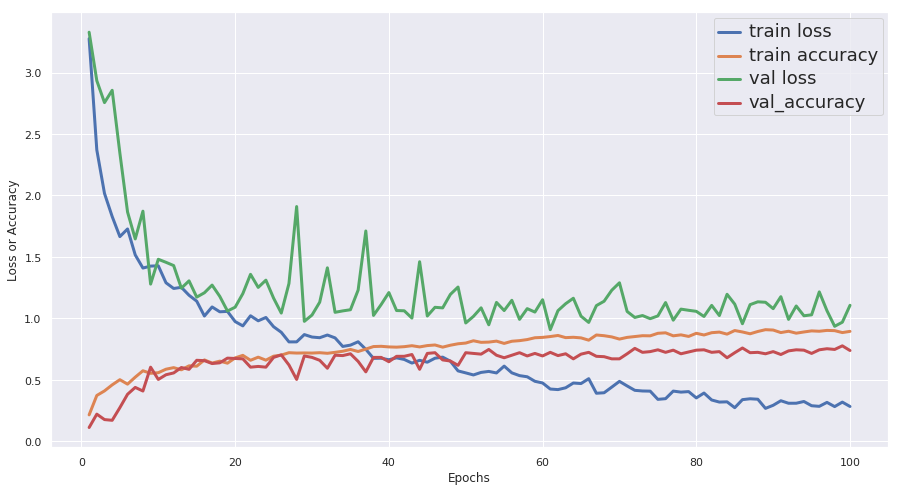

In [10]:
# plot the performance
epochs = range(1, 101)
loss = H.history['loss']
accuracy = H.history['acc']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_acc']
plot_df = pd.DataFrame(
    data=np.c_[epochs, loss, accuracy, val_loss, val_accuracy],
    columns=['epochs', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss',
             linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax,
             label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss',
             linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax,
             label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18');  